In [57]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

# graphviz 나무구조 시각화
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import os

In [58]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False

In [59]:
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [4]:
df=pd.read_csv("data/BigData/체질검사.csv")
df_y=df['FAT']
df_x = df.drop('FAT',axis=1)


In [5]:
# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(176, 13)
train data Y size :(176,)
test data X size :(76, 13)
test data Y size :(76,)


In [6]:
tree_uncustomize = DecisionTreeRegressor(random_state=1234)
tree_uncustomize.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(tree_uncustomize.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Score on test set : {:.3f}".format(tree_uncustomize.score(df_test_x,df_test_y)))

Score on training set : 1.000
Score on test set : 0.295


In [7]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_leaf = [n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [8]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


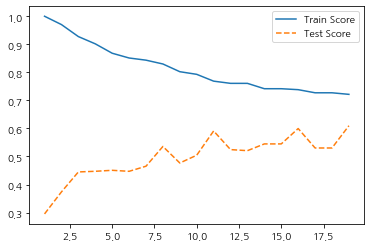

In [9]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-",label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

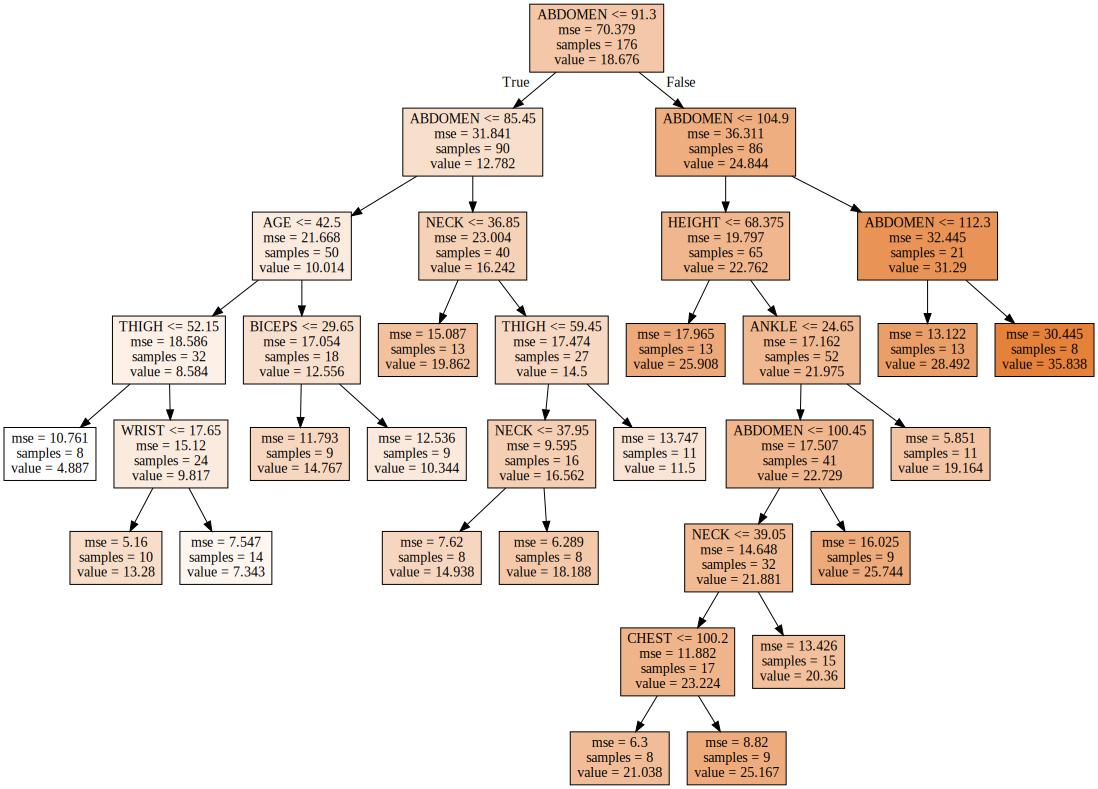

In [10]:
# 변수명 저장
v_feature_name=df_train_x.columns

# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

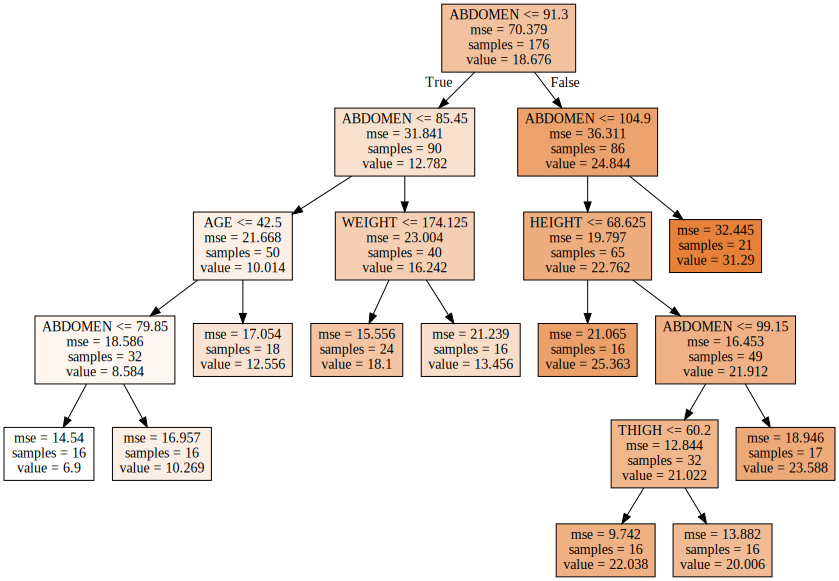

In [11]:
# 변수명 저장
v_feature_name=df_train_x.columns

# 노드의 최소 자료수=16 모델
tree_graph=DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [12]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_split = [n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

In [13]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.987,0.329
1,6,0.968,0.378
2,8,0.939,0.446
3,10,0.918,0.393
4,12,0.901,0.385
5,14,0.885,0.463
6,16,0.872,0.532
7,18,0.868,0.523
8,20,0.851,0.551
9,22,0.817,0.535


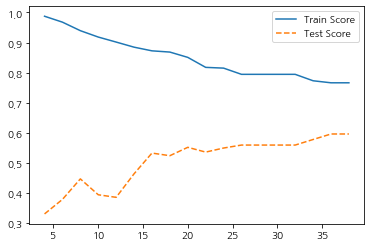

In [14]:
plt.plot(para_split, train_score,linestyle="-", label ="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

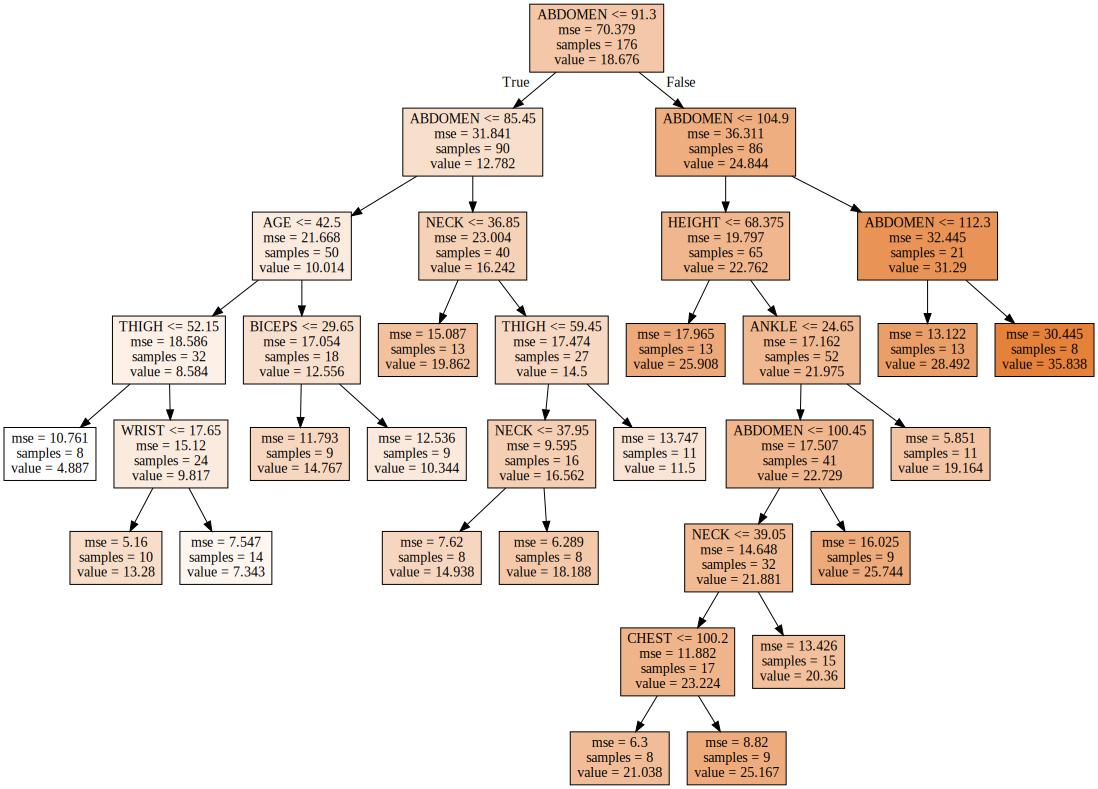

In [15]:
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot", feature_names=v_feature_name, impurity=True,
                filled=True)

with open("tree_split.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

분리 노드의 최소 자료수 변경 결과 비교 (20 vs 26)

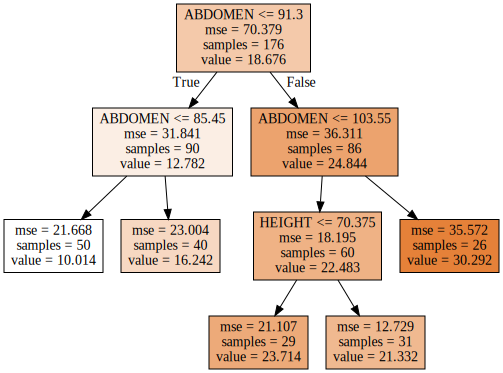

In [16]:
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot", feature_names=v_feature_name, impurity=True,
                filled=True)

with open("tree_split.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

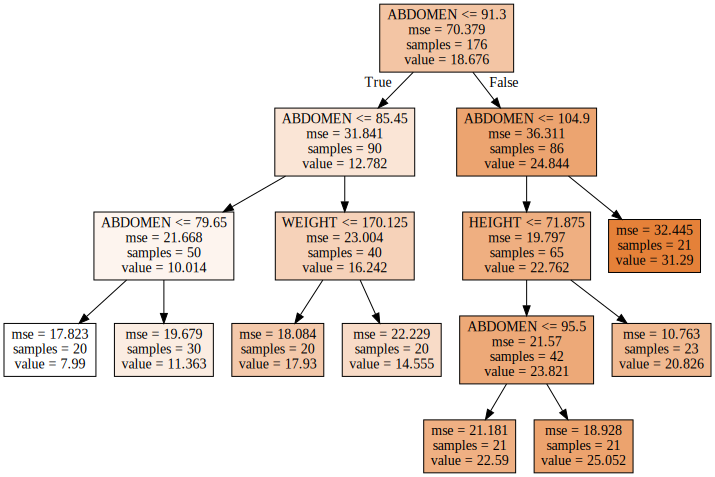

In [17]:
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot", feature_names=v_feature_name, impurity=True,
                filled=True)

with open("tree_split.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [18]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234,min_samples_leaf=8, min_samples_split=20, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['MinSamplesSplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [19]:
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


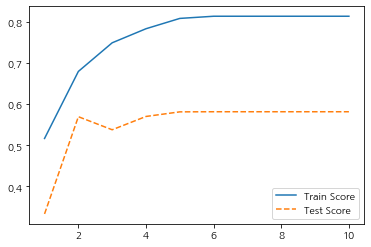

In [20]:
plt.plot(para_depth, train_score, linestyle="-", label ="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

### max_depth : 최대 깊이 변경 결과, 모델 성능 비교(2 vs 4)

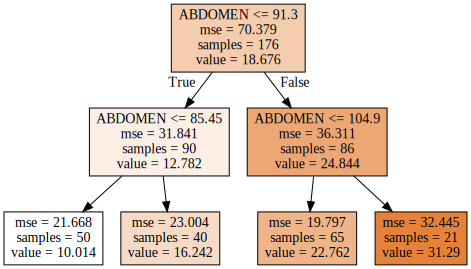

In [21]:
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8, min_samples_split=20, max_depth=2)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot", feature_names=v_feature_name, impurity=True,
                filled=True)

with open("tree_depth.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

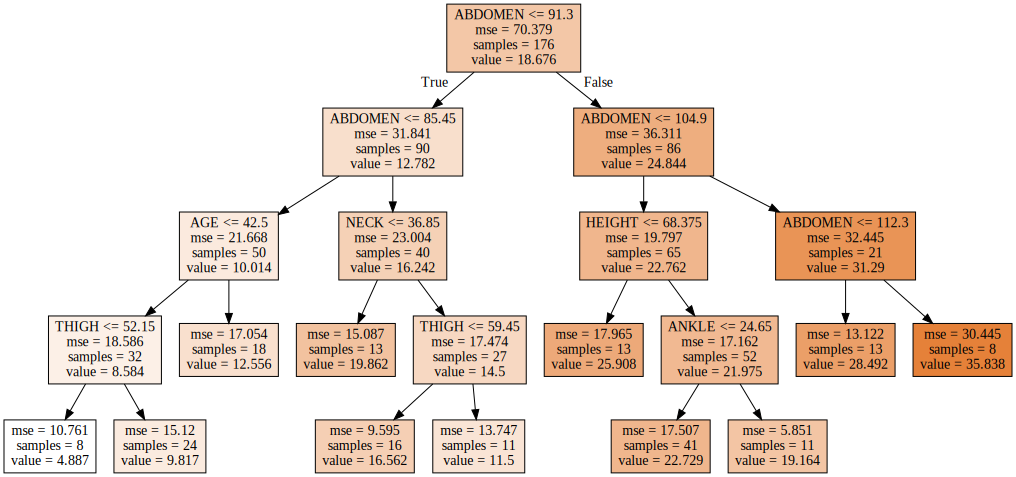

In [22]:
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8, min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot", feature_names=v_feature_name, impurity=True,
                filled=True)

with open("tree_depth.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

최종 모델 선정

In [23]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split=20, max_depth=4,
                                  random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

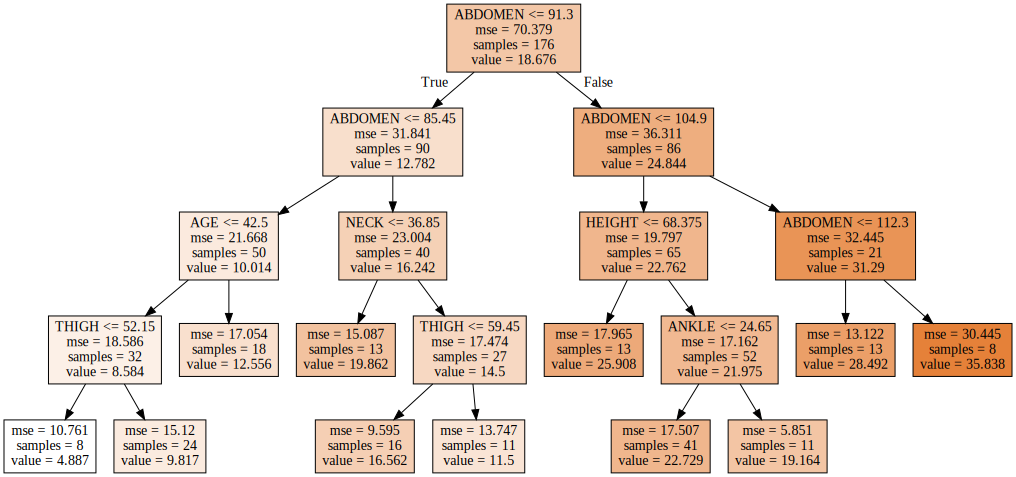

In [24]:
export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

결론도출

In [25]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

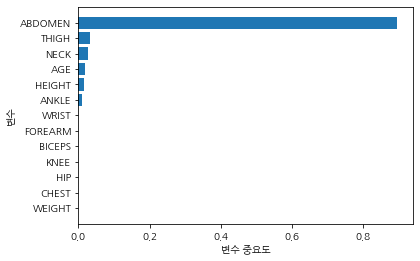

In [26]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel('변수')

### 모델 parameter 조정-추가

In [27]:
estimator = DecisionTreeRegressor()

param_grid={"criterion":["mse",'friedman_mse','mae'],'max_features':['auto','sqrt','log2'],
           'max_depth':para_depth, 'min_samples_split':para_split,
           "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator, param_grid, scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=17,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

best parameter : 
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 8}

best score:
0.636


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 의사결정나무_실습

In [60]:
dia=pd.read_csv("data/BigData/DIABETES.csv")
dia.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [61]:
dia['GENDER']=[str(t) for t in dia['GENDER']]
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
Y              442 non-null int64
AGE            442 non-null int64
GENDER         442 non-null object
BMI            442 non-null float64
BP             442 non-null float64
CHOLESTEROL    442 non-null int64
LDL            442 non-null float64
HDL            442 non-null float64
TCH            442 non-null float64
LTG            442 non-null float64
GLUCOSE        442 non-null int64
dtypes: float64(6), int64(4), object(1)
memory usage: 38.1+ KB


In [62]:
df_x=dia.drop("Y", axis=1)
df_y = dia['Y']

In [63]:

# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(309, 10)
train data Y size :(309,)
test data X size :(133, 10)
test data Y size :(133,)


In [64]:
tree_uncustomize = DecisionTreeRegressor(random_state=1234)
tree_uncustomize.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(tree_uncustomize.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Score on test set : {:.3f}".format(tree_uncustomize.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : -0.143


In [65]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_leaf = [n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [66]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.143
1,2,0.953,-0.111
2,3,0.878,0.039
3,4,0.836,0.083
4,5,0.773,0.062
5,6,0.730,0.042
6,7,0.707,0.107
7,8,0.669,0.109
8,9,0.649,0.144
9,10,0.614,0.203


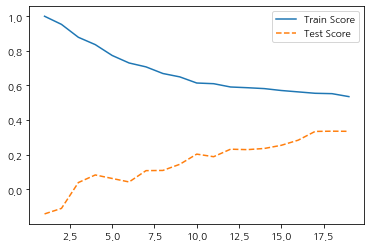

In [67]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-",label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

### leaf

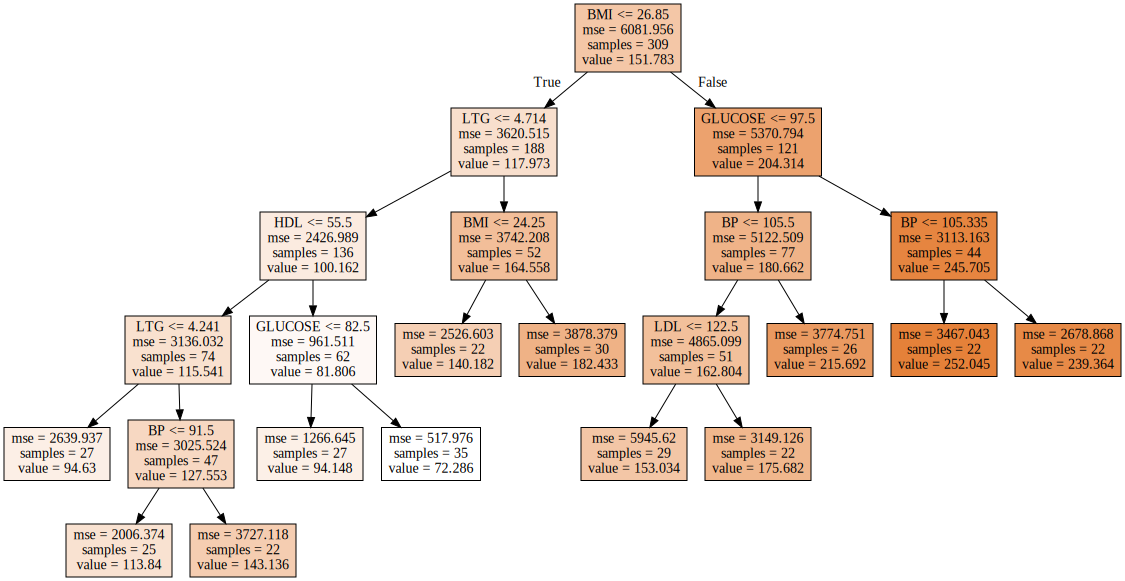

In [68]:
# 변수명 저장
v_feature_name=df_train_x.columns

# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeRegressor(random_state=1234, min_samples_leaf=22)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

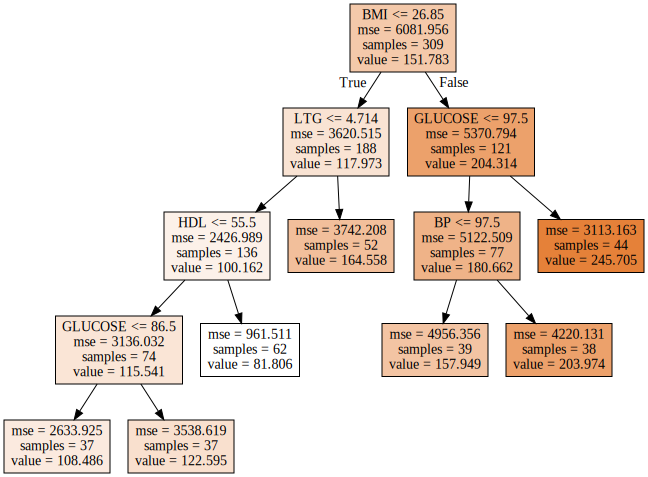

In [69]:
# 변수명 저장
v_feature_name=df_train_x.columns

# 노드의 최소 자료수=16 모델
tree_graph=DecisionTreeRegressor(random_state=1234, min_samples_leaf=37)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### split

In [70]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_split = [n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

In [71]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.979,-0.208
1,6,0.933,-0.076
2,8,0.880,0.000
3,10,0.869,0.006
4,12,0.849,0.045
5,14,0.784,0.062
6,16,0.757,0.069
7,18,0.743,0.079
8,20,0.724,0.089
9,22,0.717,0.139


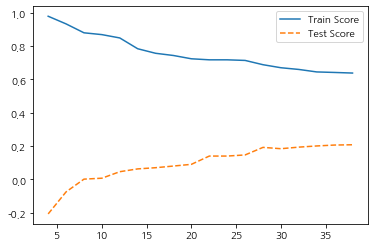

In [72]:
plt.plot(para_split, train_score,linestyle="-", label ="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

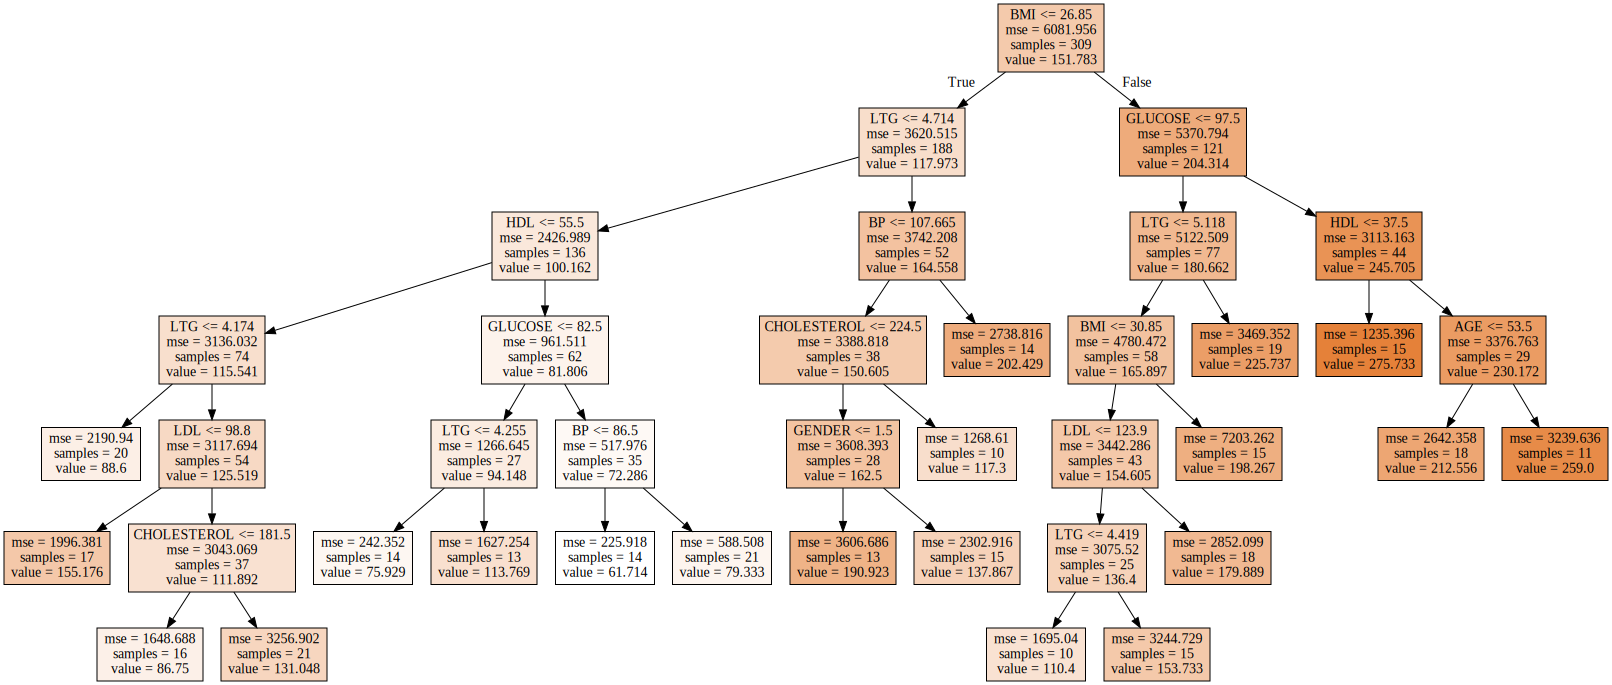

In [73]:
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=10, min_samples_split=25)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot", feature_names=v_feature_name, impurity=True,
                filled=True)

with open("tree_split.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [74]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_split = [n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234,min_samples_leaf=15, min_samples_split=16)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

In [75]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.571,0.254
1,6,0.571,0.254
2,8,0.571,0.254
3,10,0.571,0.254
4,12,0.571,0.254
5,14,0.571,0.254
6,16,0.571,0.254
7,18,0.571,0.254
8,20,0.571,0.254
9,22,0.571,0.254


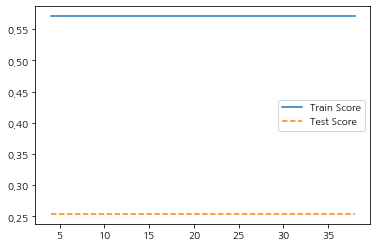

In [76]:
plt.plot(para_split, train_score,linestyle="-", label ="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

In [80]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234,min_samples_leaf=10,min_samples_split=18, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['MinSamplesSplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [77]:
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.292,0.231
1,2,0.438,0.351
2,3,0.511,0.279
3,4,0.553,0.252
4,5,0.594,0.196
5,6,0.610,0.198
6,7,0.614,0.203
7,8,0.614,0.203
8,9,0.614,0.203
9,10,0.614,0.203


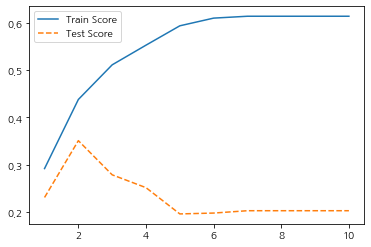

In [81]:
plt.plot(para_depth, train_score, linestyle="-", label ="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

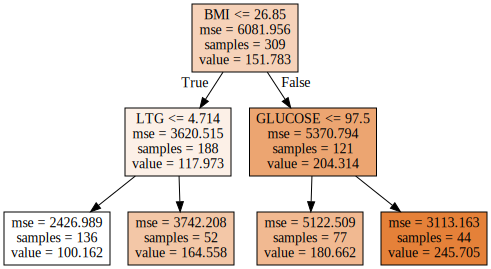

In [82]:
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=10, min_samples_split=18, max_depth=2)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot", feature_names=v_feature_name, impurity=True,
                filled=True)

with open("tree_depth.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [83]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 10, min_samples_split=18, max_depth=2,
                                  random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=18, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

# Score 계산하기

In [84]:
print(tree_final.score(df_test_x,df_test_y))

0.3510444710469337


In [53]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 15, min_samples_split=16, max_depth=8,
                                  random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [54]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.553
8,LTG,0.214
9,GLUCOSE,0.117
6,HDL,0.055
5,LDL,0.039
4,CHOLESTEROL,0.017
3,BP,0.006
0,AGE,0.000
1,GENDER,0.000
7,TCH,0.000


Text(0, 0.5, '변수')

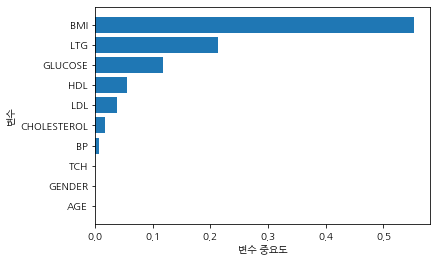

In [55]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel('변수')

In [48]:
estimator = DecisionTreeRegressor()

param_grid={"criterion":["mse",'friedman_mse','mae'],'max_features':['auto','sqrt','log2'],
           'max_depth':para_depth, 'min_samples_split':para_split,
           "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator, param_grid, scoring="r2",n_jobs=-1) # n_jobs =-1 : 사용되는 코어 개수
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=16,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=None, splitter='best')

best parameter : 
{'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 16}

best score:
0.422
